In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import random

In [3]:
random.seed(10)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Capstone Semester 6/software_requirements_extended.csv")

In [5]:
df.head(5)

,Type,Requirement
0,PE,The system shall refresh the display every 60 ...
1,LF,The application shall match the color of the s...
2,US,If projected the data must be readable. On ...
3,A,The product shall be available during normal ...
4,US,If projected the data must be understandable...


# **Preprocessing raw data**
1. Removing stopwords
2. lemmetization
3. Removing unwanted symbols
4. Lowercasing

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
lemmatizer = WordNetLemmatizer()
stopwords_english = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
tokens = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)

def process_text(text):
  text = re.sub(r'\d', '',text)
  unwanted_symbols = ['€', '™', 'â', '‹','%']
  for symbol in unwanted_symbols:
    text = text.replace(symbol, '')

  text_tokens = tokens.tokenize(text)
  clean_text=""
  for word in text_tokens:
    if (word not in stopwords_english and  word not in string.punctuation):
      if len(word)<=2:
        continue
      lemma_word = lemmatizer.lemmatize(word)
      clean_text = clean_text + " " + lemma_word
  return clean_text.lower()
df['cleaned_text'] = df['Requirement'].apply(process_text)

In [8]:
df.head()

,Type,Requirement,cleaned_text
0,PE,The system shall refresh the display every 60 ...,system shall refresh display every second
1,LF,The application shall match the color of the s...,application shall match color schema set fort...
2,US,If projected the data must be readable. On ...,projected data must readable projection scree...
3,A,The product shall be available during normal ...,product shall available normal business hour ...
4,US,If projected the data must be understandable...,projected data must understandable projection...


In [111]:
X = df.iloc[:,2]
y = df["Type"]

# **Label encoding the output class**

In [112]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [113]:
y

array([ 9,  5, 13,  0, 13, 12, 13,  9,  1,  1,  1,  4,  4,  4,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  8,  8,  8,  8,  8,  5,  5,  5, 10, 13, 13, 13,
       13, 13,  9,  9,  9,  9,  0,  0, 11, 11, 11,  8,  8,  8,  8,  8, 12,
       12, 12, 12, 12, 12, 12,  4,  4,  4,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  8,  8,  8,  8,  8,  5,
        5, 13, 13, 13, 13, 13, 13, 13, 13, 13,  9,  0,  3, 11, 11, 11,  8,
        8,  8,  8,  8,  8,  8, 13,  6,  6,  6, 13,  6, 13,  8,  8, 12, 12,
       12, 12,  3, 12, 11, 13,  8,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        9,  9,  8,  8, 12, 12,  4,  8,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        5,  5,  5, 13, 13

# **Stratified Spliting of Data into train and test set**

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

# **Converting text to numeric sequences**

In [115]:
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [116]:
# Embedding layer expects the words to be in numeric form
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [117]:
X_train[0]

[233, 226, 194, 1729, 233, 530, 143]

In [118]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

1823

In [119]:
# Padding all reviews to fixed length 100

maxlen = 30

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_train[0]

array([ 233,  226,  194, 1729,  233,  530,  143,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [120]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [121]:
!chmod 600 ~/.kaggle/kaggle.json


In [122]:
!kaggle datasets download -d sawarn69/glove6b100dtxt

glove6b100dtxt.zip: Skipping, found more recently modified local copy (use --force to force download)


In [123]:
!unzip /content/glove6b100dtxt.zip

Archive:  /content/glove6b100dtxt.zip
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [36]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/glove.6B.100d.txt')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [37]:
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [38]:
embedding_matrix.shape

(1823, 100)

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Function to plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()


# **LSTM Model 1**

In [124]:
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.models import Sequential

lstm_mod1 = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
lstm_mod1.add(embedding_layer)
lstm_mod1.add(LSTM(128, return_sequences=True))
lstm_mod1.add(Dropout(0.2))
lstm_mod1.add(LSTM(128))
lstm_mod1.add(Dense(14, activation='softmax'))
lstm_mod1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])

In [125]:
print(f"Summary of LSTM Model 1:")
print(lstm_mod1.summary())

Summary of LSTM Model 1:
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 30, 100)           182300    
                                                                 
 lstm_29 (LSTM)              (None, 30, 128)           117248    
                                                                 
 dropout_19 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_30 (LSTM)              (None, 128)               131584    
                                                                 
 dense_16 (Dense)            (None, 14)                1806      
                                                                 
Total params: 432938 (1.65 MB)
Trainable params: 250638 (979.05 KB)
Non-trainable params: 182300 (712.11 KB)
___________________________________________________

In [126]:
X_train.shape

(781, 30)

Epoch 1/20
20/20 [==============================] - 4s 215ms/step - loss: 1.0007 - acc: 0.6939 - val_loss: 1.4231 - val_acc: 0.5541
Epoch 2/20
20/20 [==============================] - 5s 249ms/step - loss: 1.0009 - acc: 0.6747 - val_loss: 1.3832 - val_acc: 0.6115
Epoch 3/20
20/20 [==============================] - 3s 128ms/step - loss: 0.9247 - acc: 0.6955 - val_loss: 1.3978 - val_acc: 0.5860
Epoch 4/20
20/20 [==============================] - 2s 102ms/step - loss: 0.8364 - acc: 0.7388 - val_loss: 1.4100 - val_acc: 0.5987
Epoch 5/20
20/20 [==============================] - 2s 103ms/step - loss: 0.6606 - acc: 0.7949 - val_loss: 1.3163 - val_acc: 0.6433
Epoch 6/20
20/20 [==============================] - 2s 112ms/step - loss: 0.7428 - acc: 0.7660 - val_loss: 1.4139 - val_acc: 0.6115
Epoch 7/20
20/20 [==============================] - 2s 119ms/step - loss: 0.6831 - acc: 0.7837 - val_loss: 1.3761 - val_acc: 0.6752
Epoch 8/20
20/20 [==============================] - 5s 231ms/step - loss: 0.

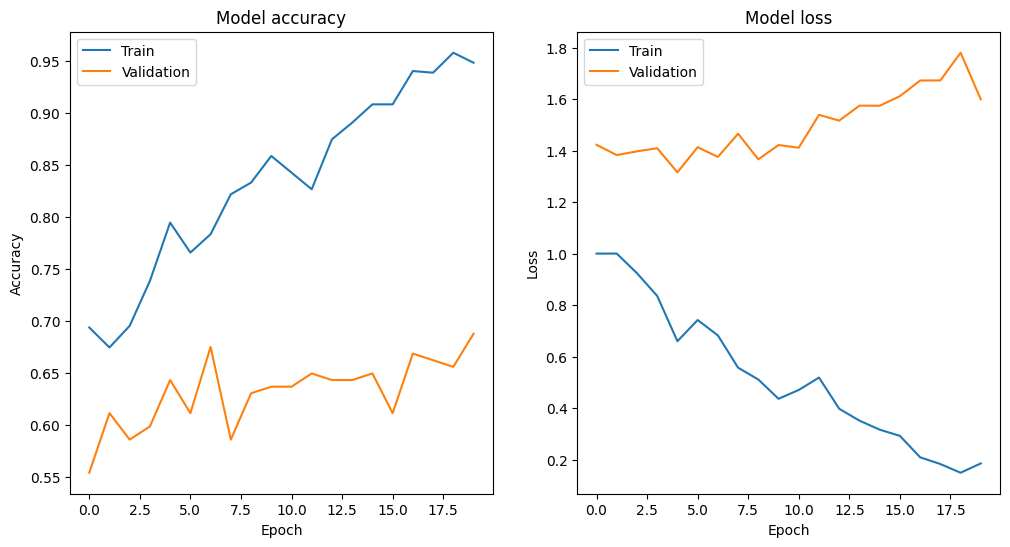

In [128]:
history = lstm_mod1.fit(X_train, y_train,epochs=20, verbose=1, validation_split=0.2)
plot_history(history)

In [129]:
print("Evaluating LSTM Model 1")
test_loss, test_accuracy = lstm_mod1.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

y_pred = np.argmax(lstm_mod1.predict([X_test]),1)

print(f"Classification Report for LSTM Model 1:")
print(classification_report(y_test, y_pred))


Evaluating LSTM Model 1
7/7 [==============================] - 0s 33ms/step - loss: 1.6313 - acc: 0.6633
Test Loss: 1.6313, Test Accuracy: 0.6633
7/7 [==============================] - 1s 28ms/step
Classification Report for LSTM Model 1:
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.63      0.76      0.69        42
           2       0.84      0.86      0.85        63
           3       0.00      0.00      0.00         2
           4       0.33      0.50      0.40         2
           5       0.67      0.29      0.40         7
           6       0.00      0.00      0.00         3
           7       0.71      0.68      0.70        22
           8       0.60      0.50      0.55        12
           9       0.67      0.18      0.29        11
          11       1.00      0.25      0.40         4
          12       0.40      0.73      0.52        11
          13       0.54      0.54      0.54        13

    

# **LSTM Model 2**

In [130]:
lstm_mod2 = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)
lstm_mod2.add(embedding_layer)
lstm_mod2.add(LSTM(128, return_sequences=True))
lstm_mod2.add(Dropout(0.2))
lstm_mod2.add(LSTM(128, return_sequences=True))
lstm_mod2.add(Dropout(0.2))
lstm_mod2.add(LSTM(64))
lstm_mod2.add(Dense(32, activation='relu'))
lstm_mod2.add(Dropout(0.2))
lstm_mod2.add(Dense(14, activation='sigmoid'))

lstm_mod2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])


In [131]:
print(f"Summary of LSTM Model 2:")
print(lstm_mod2.summary())

Summary of LSTM Model 2:
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 30, 100)           182300    
                                                                 
 lstm_31 (LSTM)              (None, 30, 128)           117248    
                                                                 
 dropout_20 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_32 (LSTM)              (None, 30, 128)           131584    
                                                                 
 dropout_21 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_33 (LSTM)              (None, 64)                49408     
                                                                 
 dense_17 (Dense)           

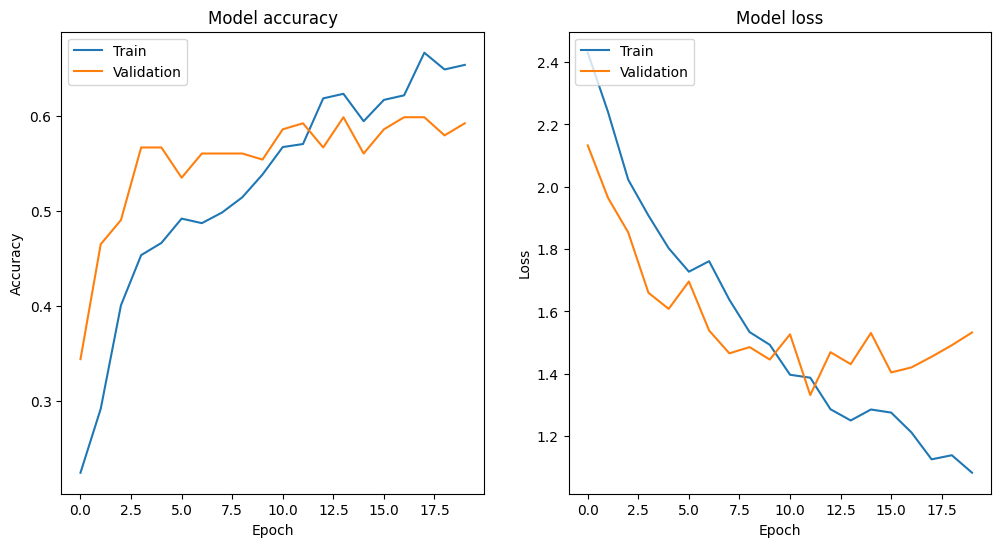

In [132]:
history = lstm_mod2.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.2)
plot_history(history)

In [133]:
print("Evaluating LSTM Model 2")
test_loss, test_accuracy = lstm_mod2.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

y_pred = np.argmax(lstm_mod2.predict([X_test]),1)

print(f"Classification Report for LSTM Model 2:")
print(classification_report(y_test, y_pred))


Evaluating LSTM Model 2
7/7 [==============================] - 0s 36ms/step - loss: 1.3771 - acc: 0.6122
Test Loss: 1.3771, Test Accuracy: 0.6122
7/7 [==============================] - 1s 36ms/step
Classification Report for LSTM Model 2:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.74      0.74      0.74        42
           2       0.77      0.97      0.86        63
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         3
           7       0.60      0.41      0.49        22
           8       0.30      0.67      0.41        12
           9       0.12      0.18      0.15        11
          11       0.00      0.00      0.00         4
          12       0.75      0.27      0.40        11
          13       0.46      0.46      0.46        13

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **LSTM Model 3**

In [134]:
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.models import Sequential

lstm_mod3 = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
lstm_mod3.add(embedding_layer)
lstm_mod3.add(LSTM(128, return_sequences=True))
lstm_mod3.add(Dropout(0.5))
lstm_mod3.add(LSTM(128))
lstm_mod3.add(Dense(14, activation='softmax'))
lstm_mod3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])

In [135]:
print(f"Summary of LSTM Model 3:")
print(lstm_mod3.summary())

Summary of LSTM Model 3:
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 30, 100)           182300    
                                                                 
 lstm_34 (LSTM)              (None, 30, 128)           117248    
                                                                 
 dropout_23 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_35 (LSTM)              (None, 128)               131584    
                                                                 
 dense_19 (Dense)            (None, 14)                1806      
                                                                 
Total params: 432938 (1.65 MB)
Trainable params: 250638 (979.05 KB)
Non-trainable params: 182300 (712.11 KB)
___________________________________________________

Epoch 1/20
20/20 [==============================] - 9s 218ms/step - loss: 2.2527 - acc: 0.2901 - val_loss: 2.0167 - val_acc: 0.3439
Epoch 2/20
20/20 [==============================] - 2s 102ms/step - loss: 2.0591 - acc: 0.3333 - val_loss: 1.8271 - val_acc: 0.4522
Epoch 3/20
20/20 [==============================] - 2s 105ms/step - loss: 1.8168 - acc: 0.4647 - val_loss: 1.6934 - val_acc: 0.5096
Epoch 4/20
20/20 [==============================] - 2s 97ms/step - loss: 1.6515 - acc: 0.4856 - val_loss: 1.5795 - val_acc: 0.5223
Epoch 5/20
20/20 [==============================] - 2s 94ms/step - loss: 1.5377 - acc: 0.5192 - val_loss: 1.5660 - val_acc: 0.5478
Epoch 6/20
20/20 [==============================] - 3s 151ms/step - loss: 1.3898 - acc: 0.5529 - val_loss: 1.3266 - val_acc: 0.5732
Epoch 7/20
20/20 [==============================] - 4s 191ms/step - loss: 1.3465 - acc: 0.5849 - val_loss: 1.3674 - val_acc: 0.5605
Epoch 8/20
20/20 [==============================] - 2s 97ms/step - loss: 1.222

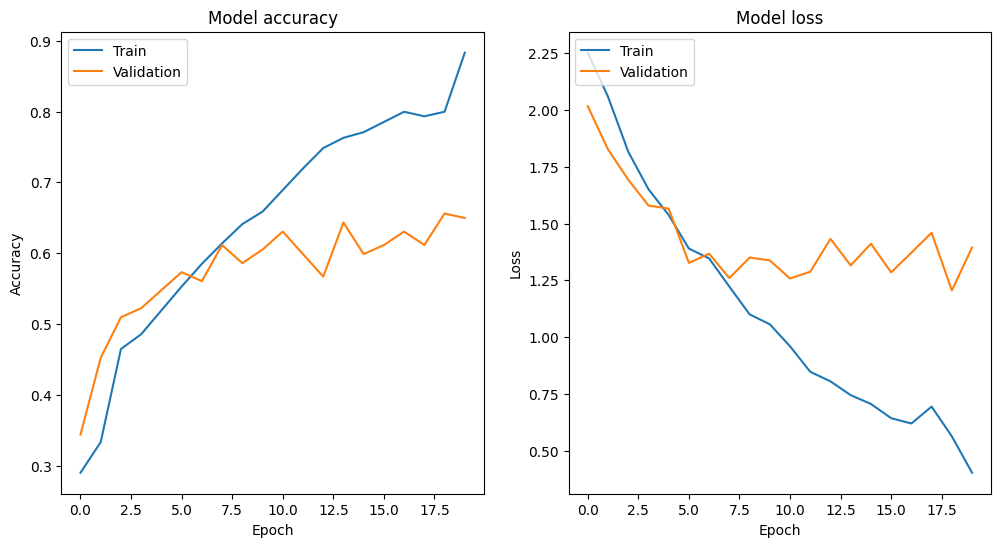

In [136]:
history = lstm_mod3.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.2)
plot_history(history)

In [137]:
print("Evaluating LSTM Model 3")
test_loss, test_accuracy = lstm_mod3.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

y_pred = np.argmax(lstm_mod3.predict([X_test]),1)

print(f"Classification Report for LSTM Model 3:")
print(classification_report(y_test, y_pred))


Evaluating LSTM Model 3
7/7 [==============================] - 0s 58ms/step - loss: 1.2066 - acc: 0.6684
Test Loss: 1.2066, Test Accuracy: 0.6684
7/7 [==============================] - 2s 35ms/step
Classification Report for LSTM Model 3:
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.73      0.71      0.72        42
           2       0.88      0.89      0.88        63
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.40      0.29      0.33         7
           6       0.00      0.00      0.00         3
           7       0.59      0.59      0.59        22
           8       0.62      0.42      0.50        12
           9       0.33      0.55      0.41        11
          11       0.25      0.50      0.33         4
          12       0.60      0.55      0.57        11
          13       0.71      0.77      0.74        13

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **LSTM Model 4**

In [138]:
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.models import Sequential

lstm_mod4 = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
lstm_mod4.add(embedding_layer)
lstm_mod4.add(LSTM(256, return_sequences=True))
lstm_mod4.add(Dropout(0.4))
lstm_mod4.add(LSTM(128))
lstm_mod4.add(Dense(14, activation='softmax'))
lstm_mod4.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])

In [139]:
print(f"Summary of LSTM Model 4:")
print(lstm_mod4.summary())

Summary of LSTM Model 4:
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 30, 100)           182300    
                                                                 
 lstm_36 (LSTM)              (None, 30, 256)           365568    
                                                                 
 dropout_24 (Dropout)        (None, 30, 256)           0         
                                                                 
 lstm_37 (LSTM)              (None, 128)               197120    
                                                                 
 dense_20 (Dense)            (None, 14)                1806      
                                                                 
Total params: 746794 (2.85 MB)
Trainable params: 564494 (2.15 MB)
Non-trainable params: 182300 (712.11 KB)
_____________________________________________________

Epoch 1/20
20/20 [==============================] - 8s 205ms/step - loss: 2.2259 - acc: 0.2917 - val_loss: 1.9749 - val_acc: 0.3439
Epoch 2/20
20/20 [==============================] - 4s 221ms/step - loss: 1.9481 - acc: 0.3606 - val_loss: 1.6488 - val_acc: 0.5350
Epoch 3/20
20/20 [==============================] - 4s 221ms/step - loss: 1.7365 - acc: 0.4760 - val_loss: 1.5923 - val_acc: 0.5541
Epoch 4/20
20/20 [==============================] - 3s 153ms/step - loss: 1.5837 - acc: 0.4968 - val_loss: 1.4718 - val_acc: 0.5796
Epoch 5/20
20/20 [==============================] - 3s 159ms/step - loss: 1.4801 - acc: 0.5321 - val_loss: 1.4658 - val_acc: 0.5669
Epoch 6/20
20/20 [==============================] - 3s 176ms/step - loss: 1.4373 - acc: 0.5513 - val_loss: 1.4636 - val_acc: 0.5732
Epoch 7/20
20/20 [==============================] - 5s 268ms/step - loss: 1.2860 - acc: 0.5881 - val_loss: 1.5312 - val_acc: 0.5541
Epoch 8/20
20/20 [==============================] - 3s 152ms/step - loss: 1.

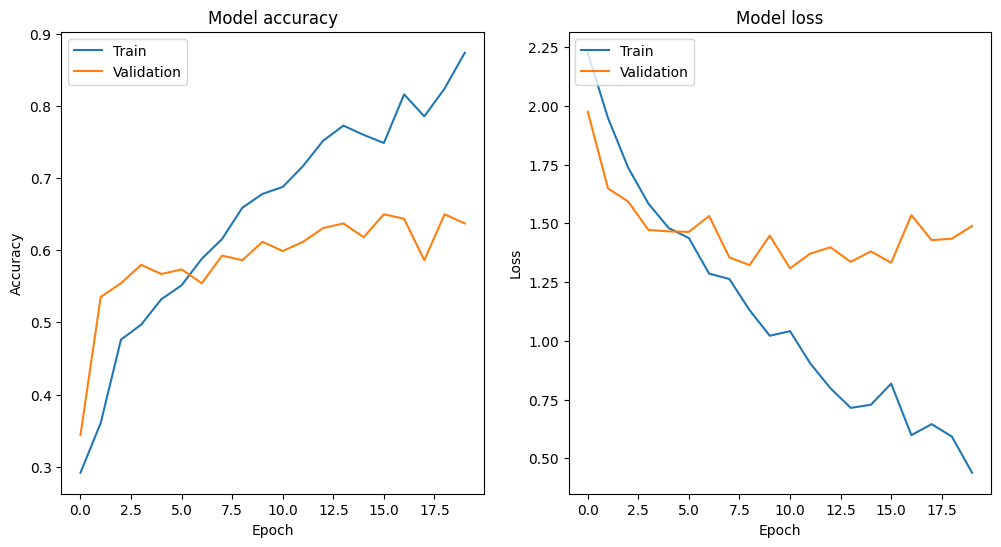

In [140]:
history = lstm_mod4.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.2)
plot_history(history)

In [141]:
print("Evaluating LSTM Model 4")
test_loss, test_accuracy = lstm_mod4.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

y_pred = np.argmax(lstm_mod4.predict([X_test]),1)

print(f"Classification Report for LSTM Model 4:")
print(classification_report(y_test, y_pred))


Evaluating LSTM Model 4
7/7 [==============================] - 0s 43ms/step - loss: 1.1644 - acc: 0.6888
Test Loss: 1.1644, Test Accuracy: 0.6888
7/7 [==============================] - 1s 51ms/step
Classification Report for LSTM Model 4:
              precision    recall  f1-score   support

           0       0.25      0.75      0.38         4
           1       0.78      0.74      0.76        42
           2       0.79      0.95      0.86        63
           3       0.00      0.00      0.00         2
           4       0.50      0.50      0.50         2
           5       1.00      0.57      0.73         7
           6       0.00      0.00      0.00         3
           7       0.50      0.41      0.45        22
           8       0.47      0.58      0.52        12
           9       1.00      0.27      0.43        11
          11       0.00      0.00      0.00         4
          12       0.75      0.55      0.63        11
          13       0.73      0.85      0.79        13

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **LSTM Model 5**

In [142]:
lstm_mod5 = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)
lstm_mod5.add(embedding_layer)
lstm_mod5.add(LSTM(128, return_sequences=True))
lstm_mod5.add(Dropout(0.6))
lstm_mod5.add(LSTM(128, return_sequences=True))
lstm_mod5.add(Dropout(0.4))
lstm_mod5.add(LSTM(64))
lstm_mod5.add(Dense(32, activation='relu'))
lstm_mod5.add(Dropout(0.2))
lstm_mod5.add(Dense(14, activation='softmax'))

lstm_mod5.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])

In [143]:
print(f"Summary of LSTM Model 5:")
print(lstm_mod5.summary())

Summary of LSTM Model 5:
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 30, 100)           182300    
                                                                 
 lstm_38 (LSTM)              (None, 30, 128)           117248    
                                                                 
 dropout_25 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_39 (LSTM)              (None, 30, 128)           131584    
                                                                 
 dropout_26 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_40 (LSTM)              (None, 64)                49408     
                                                                 
 dense_21 (Dense)           

Epoch 1/20
20/20 [==============================] - 14s 231ms/step - loss: 2.4532 - acc: 0.2260 - val_loss: 2.0917 - val_acc: 0.3439
Epoch 2/20
20/20 [==============================] - 2s 122ms/step - loss: 2.1673 - acc: 0.3702 - val_loss: 2.2382 - val_acc: 0.2803
Epoch 3/20
20/20 [==============================] - 5s 241ms/step - loss: 2.2191 - acc: 0.2612 - val_loss: 2.0050 - val_acc: 0.3439
Epoch 4/20
20/20 [==============================] - 3s 153ms/step - loss: 2.1932 - acc: 0.2692 - val_loss: 2.0044 - val_acc: 0.3439
Epoch 5/20
20/20 [==============================] - 2s 121ms/step - loss: 2.1886 - acc: 0.2708 - val_loss: 2.0212 - val_acc: 0.3439
Epoch 6/20
20/20 [==============================] - 2s 123ms/step - loss: 2.1802 - acc: 0.2740 - val_loss: 2.0052 - val_acc: 0.3439
Epoch 7/20
20/20 [==============================] - 2s 120ms/step - loss: 2.1506 - acc: 0.3013 - val_loss: 2.0120 - val_acc: 0.3439
Epoch 8/20
20/20 [==============================] - 4s 197ms/step - loss: 2

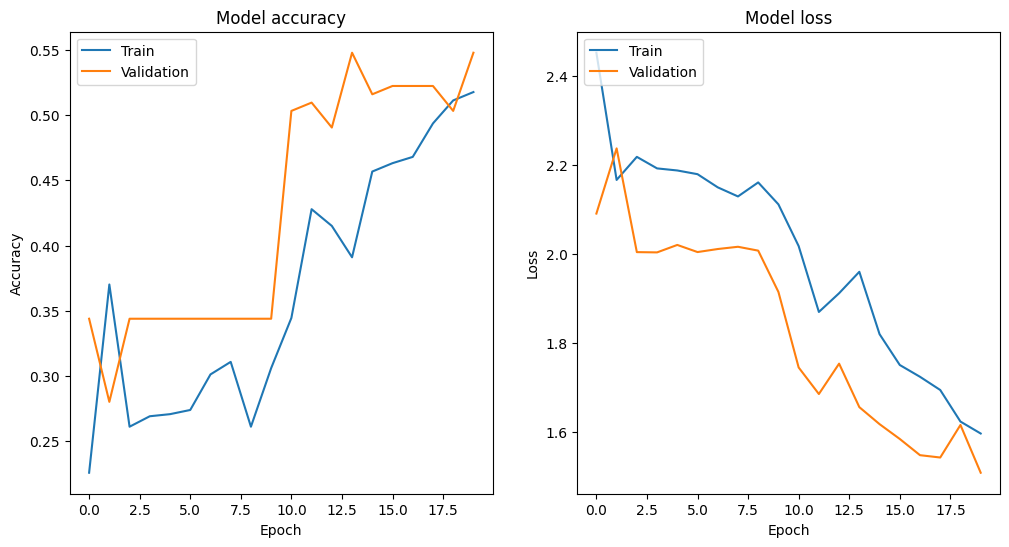

In [144]:
history = lstm_mod5.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.2)
plot_history(history)

In [145]:
print("Evaluating LSTM Model 5")
test_loss, test_accuracy = lstm_mod5.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

y_pred = np.argmax(lstm_mod5.predict([X_test]),1)

print(f"Classification Report for LSTM Model 5:")
print(classification_report(y_test, y_pred))


Evaluating LSTM Model 5
7/7 [==============================] - 0s 33ms/step - loss: 1.5558 - acc: 0.5102
Test Loss: 1.5558, Test Accuracy: 0.5102
7/7 [==============================] - 1s 32ms/step
Classification Report for LSTM Model 5:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.44      0.93      0.60        42
           2       0.76      0.89      0.82        63
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         3
           7       0.31      0.18      0.23        22
           8       0.33      0.08      0.13        12
           9       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        13

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Saving all models**

In [146]:
lstm_mod1.save('lstm_mod1.h5')
lstm_mod2.save('lstm_mod2.h5')
lstm_mod3.save('lstm_mod3.h5')
lstm_mod4.save('lstm_mod4.h5')
lstm_mod5.save('lstm_mod5.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Creating Ensemble model**

In [147]:
from keras.models import load_model

# List to store imported models
imported_models = []

# Import each saved model
for i in range(1, 6):  # Assuming you saved models with filenames 'lstm_model_1.h5' to 'lstm_model_5.h5'
    model = load_model(f'lstm_mod{i}.h5')
    imported_models.append(model)
    print(f"Model lstm_mod{i}.h5 imported successfully.")

# Now you can use the imported_models list to access each imported model


Model lstm_mod1.h5 imported successfully.
Model lstm_mod2.h5 imported successfully.
Model lstm_mod3.h5 imported successfully.
Model lstm_mod4.h5 imported successfully.
Model lstm_mod5.h5 imported successfully.


In [148]:
accuracies = [0.66,0.61,0.67,0.69,0.51]

In [149]:
lstm_mod5.predict([X_test])

7/7 [==============================] - 1s 90ms/step


array([[0.04900096, 0.09765861, 0.0726105 , ..., 0.05974049, 0.04106464,
        0.18752387],
       [0.00425106, 0.61880237, 0.03762168, ..., 0.00620735, 0.11409575,
        0.06027661],
       [0.00422755, 0.6184294 , 0.03912844, ..., 0.00611277, 0.11466012,
        0.05957803],
       ...,
       [0.00160304, 0.02657258, 0.74229354, ..., 0.00325281, 0.01583083,
        0.01726529],
       [0.05556928, 0.0674236 , 0.07131706, ..., 0.07121769, 0.03246687,
        0.15094814],
       [0.02253999, 0.29879975, 0.04895258, ..., 0.022699  , 0.08950006,
        0.14556843]], dtype=float32)

In [157]:
# Calculate weights based on accuracies
total_accuracy = sum(accuracies)
weights = [acc / total_accuracy for acc in accuracies]
# List to store predictions from each model
ensemble_predictions = []
# Get predictions from each model
for model in imported_models:
    y_pred_prob = model.predict([X_test])
    ensemble_predictions.append(y_pred_prob)

ensemble_predictions_3d = np.array(ensemble_predictions)

# Calculate the weighted average along the first axis (axis=0)
weighted_predictions = np.average(ensemble_predictions_3d, axis=0, weights=weights)

y_pred = np.argmax(weighted_predictions,1)


# Print performance report for the ensemble model
print("Performance Report for Ensemble Model:")

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Calculate ensemble accuracy on test data
ensemble_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy for Ensemble Model:", ensemble_accuracy)
print(classification_report(y_test, y_pred))



7/7 [==============================] - 0s 61ms/step
Performance Report for Ensemble Model:
Test Accuracy for Ensemble Model: 0.7397959183673469
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.69      0.86      0.77        42
           2       0.86      0.94      0.89        63
           3       0.00      0.00      0.00         2
           4       1.00      0.50      0.67         2
           5       0.75      0.43      0.55         7
           6       0.00      0.00      0.00         3
           7       0.65      0.59      0.62        22
           8       0.62      0.67      0.64        12
           9       0.67      0.36      0.47        11
          11       1.00      0.25      0.40         4
          12       0.73      0.73      0.73        11
          13       0.69      0.69      0.69        13

    accuracy                           0.74       196
   macro avg       0.63      0.52      0.54 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Testing the model manually**

In [161]:
def evaluate_sentiment(requirement, tokenizer, max_length, ensemble_models, weights):
    # Tokenize the review
    tokenized_review = tokenizer.texts_to_sequences([requirement])

    # Pad sequences
    padded_review = pad_sequences(tokenized_review, maxlen=max_length, padding='post')

    # List to store predictions from each model
    ensemble_predictions = []

    # Get predictions from each model
    for model in ensemble_models:
        y_pred_prob = model.predict(padded_review)
        ensemble_predictions.append(y_pred_prob)

    ensemble_predictions_3d = np.array(ensemble_predictions)

    # Calculate the weighted average along the first axis (axis=0)
    weighted_predictions = np.average(ensemble_predictions_3d, axis=0, weights=weights)

    y_pred = np.argmax(weighted_predictions,1)


    return encoder.classes_[y_pred[0]]


In [176]:
# Define a sample review
sample_requirement = X[2]

print("Requirement:", sample_requirement)
print("Actual Software Requirement:", encoder.classes_[y[2]])

# Call the evaluate_sentiment function
predicted_sentiment = evaluate_sentiment(sample_requirement, word_tokenizer, 30, imported_models, weights)

# Print the predicted sentiment
print("Predicted Software Requirement:", predicted_sentiment)


Requirement:  projected data must readable projection screen viewer must able read event activity data viewing distance
Actual Software Requirement: US
1/1 [==============================] - 0s 151ms/step
Predicted Software Requirement: US
